In [1]:
from sklearn.datasets import load_breast_cancer, load_digits, load_iris, load_wine, make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import scipy.stats as stats

import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../source/")
from evolutionary import *
from functools import partial
import scipy
from copy import deepcopy, copy
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [3]:
clf = SVC()

In [4]:
hyperparams = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": range(1,3),
    "gamma": stats.uniform(loc=0.001, scale=1/X.shape[0]).rvs,
    "shrinking": [True, False],
    "C": stats.uniform(loc=0.01, scale=1).rvs,
    "max_iter": range(100,1000)
}

discrete = [True, True, False, True, False, True]

update_distrib = [
    lambda x: np.random.choice(["linear", "poly", "rbf", "sigmoid"]) if np.random.rand() < 0.3 else x,
    lambda x: np.max([1, np.min([x + np.random.randint(-2, 2), 100])]),
    lambda x: np.max([0.01, np.min([x + stats.uniform(-0.1, 0.1).rvs(), 100])]),
    lambda x: np.random.choice([True, False]) if np.random.rand() < 0.3 else x,
    lambda x: np.max([0.01, np.min([x + stats.uniform(-0.1, 0.1).rvs(), 100])]),
    lambda x: x
]

In [5]:
def fitness(c: DictionaryCandidate, clf, X_train, y_train, X_val, y_val, debug=False):
    if debug:
        print(c.values)
    clf.set_params(**c.values)
    clf.fit(X_train, y_train)
    return accuracy_score(y_val, clf.predict(X_val))

In [6]:
genalgo_hyper = GeneticAlgorithm(100,
                                DictionaryCandidate,
                                partial(tournament_selection, tournament_size=5),
                                partial(fitness, X_train=X_train, y_train=y_train,
                                        X_val=X_val, y_val=y_val, clf=clf, debug=True),
                                elitism=False,
                                **{"names": list(hyperparams.keys()),
                                   "gens": list(hyperparams.values()),
                                   "discrete": discrete,
                                   "update_distrib": update_distrib}
                                )

In [7]:
iters = 10

genalgo_hyper.fit(iters, keep_history=True, show_iters=True)
history_f = genalgo_hyper.fitness_h
history_b = genalgo_hyper.best_h

0
{'kernel': 'poly', 'degree': 1, 'gamma': 0.0014722945173024102, 'shrinking': False, 'C': 0.6740836930145947, 'max_iter': 344}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.0014722945173024102, 'shrinking': False, 'C': 0.6740836930145947, 'max_iter': 344}
{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.002692824998144954, 'shrinking': True, 'C': 0.18224165469138698, 'max_iter': 441}
{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.002264833386699738, 'shrinking': True, 'C': 0.656448234013151, 'max_iter': 294}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.0025252554922829, 'shrinking': True, 'C': 0.8951483291204249, 'max_iter': 827}
{'kernel': 'linear', 'degree': 2, 'gamma': 0.002147032836003889, 'shrinking': False, 'C': 0.37629303111919155, 'max_iter': 781}
{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.0023363916257276617, 'shrinking': False, 'C': 0.5702568083417708, 'max_iter': 978}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.0019036475160229198, 'shrinking': False, 'C': 0.8210222076664025, 'm

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=344).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=344).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=781).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=237).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 2, 'gamma': 0.001494182474990668, 'shrinking': False, 'C': 0.2460565347150402, 'max_iter': 736}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.0012519676172325924, 'shrinking': False, 'C': 0.8631462835074939, 'max_iter': 725}
{'kernel': 'linear', 'degree': 2, 'gamma': 0.0018542718201030994, 'shrinking': True, 'C': 0.9031204636779913, 'max_iter': 343}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.001229324062083002, 'shrinking': False, 'C': 0.09540197316222652, 'max_iter': 835}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.001097574747172271, 'shrinking': True, 'C': 0.06564072800689967, 'max_iter': 924}
{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.002323975007651506, 'shrinking': False, 'C': 0.3259165383792446, 'max_iter': 664}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.0026629897244605577, 'shrinking': True, 'C': 0.15886297654933412, 'max_iter': 694}
{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.0014777603287034935, 'shrinking': False, 'C': 0.05090505947016454, 'm

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=736).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=343).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=835).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.0016585553249474153, 'shrinking': True, 'C': 0.11841494073771984, 'max_iter': 923}
1
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.7257174359292384, 'max_iter': 544}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.7257174359292384, 'max_iter': 544}
{'kernel': 'linear', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.7509561566644352, 'max_iter': 544}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.7942465807687864, 'max_iter': 274}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.7161764586889227, 'max_iter': 501}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.4506757038695325, 'max_iter': 465}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.4853105703759451, 'max_iter': 465}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.09202874907647467, 'max_iter

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=544).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=274).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=501).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 3, 'gamma': 0.01, 'shrinking': True, 'C': 0.3672030038006604, 'max_iter': 923}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.6361466986431035, 'max_iter': 928}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.5028897567442141, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.178846068536955, 'max_iter': 923}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.25289338887508583, 'max_iter': 274}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.6599440848220017, 'max_iter': 591}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.597968796555955, 'max_iter': 591}
{'kernel': 'linear', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.9304637943220871, 'max_iter': 928}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.8991409567509053, 'max_iter': 887}
{'kernel': 'poly', 'de

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=928).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.6445770989038178, 'max_iter': 614}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.6263396630835965, 'max_iter': 344}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.4713401237662957, 'max_iter': 887}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.5336960914637894, 'max_iter': 887}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.3192325976680891, 'max_iter': 465}
{'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.26545659325918336, 'max_iter': 596}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.5463428964883983, 'max_iter': 865}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.5437996674734055, 'max_iter': 865}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.2536039630735675, 'max_iter': 330}
{'kernel': 'linear'

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=344).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=465).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=865).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=865).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.4941708003540331, 'max_iter': 449}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.493872465521073, 'max_iter': 544}
{'kernel': 'linear', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.6877766767727687, 'max_iter': 749}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.5187621749158442, 'max_iter': 749}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.09485859408123881, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.44211217060577035, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.27797437364751415, 'max_iter': 582}
{'kernel': 'linear', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.47313304732129935, 'max_iter': 582}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.37126288737333685, 'max_iter': 274}
{'kernel':

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=449).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=465).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=956).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

3
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.3792380730408533, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.3792380730408533, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.14873646265163157, 'max_iter': 465}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.2593729568002158, 'max_iter': 947}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.28516387610240285, 'max_iter': 947}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.4135444498798071, 'max_iter': 947}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.5866888900165353, 'max_iter': 614}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.30925524312625563, 'max_iter': 865}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.2724932322978816, 'max_iter': 865}
{'kernel

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=465).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.34633316653188123, 'max_iter': 923}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.43784125382911376, 'max_iter': 928}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.48633603875663234, 'max_iter': 928}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.19431041291528894, 'max_iter': 591}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.2289785287901954, 'max_iter': 591}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.3336213647575631, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.3425514215195435, 'max_iter': 947}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.3702938860918613, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.11828809246215177, 'max_iter': 544}
{'kernel': 'poly'

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=928).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=928).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=591).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.2964671828940678, 'max_iter': 865}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.09107688947443436, 'max_iter': 544}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.04914923020704115, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.19811063539566473, 'max_iter': 449}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.178780772320101, 'max_iter': 449}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.255195706139545, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.16082908895914327, 'max_iter': 544}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.30964408408397137, 'max_iter': 343}
{'kernel': 'sigmoid', 'degree': 3, 'gamma': 0.01, 'shrinking': False, 'C': 0.3584466020476303, 'max_iter': 343}
{'kernel'

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=544).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=449).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=544).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=544).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.27701726029734175, 'max_iter': 865}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.40773078381897376, 'max_iter': 865}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.06215886561266509, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.23646219231434423, 'max_iter': 105}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.12073543734748159, 'max_iter': 105}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.0683903482278732, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.05239284374012892, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.32522533118270014, 'max_iter': 947}
{'kernel': 'poly', 'degre

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=544).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.07393419034691752, 'max_iter': 614}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 274}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.019920820039883852, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.054172534101112016, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.25624398665124737, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.19120628457693778, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.11904376980720144, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.03035945219131038, 'max_iter': 947}
{'kernel': 'rbf', 'degree': 2, 'gamma': 0

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.18681008312763012, 'max_iter': 343}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.043994843928519475, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.05536851169687311, 'max_iter': 923}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.07033533206485382, 'max_iter': 865}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.04922109388996705, 'max_iter': 582}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.011707468295866226, 'max_iter': 582}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.06840845780339744, 'max_iter': 923}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.05317992315963483, 'max_iter': 923}
{'kernel': 'poly', 'degree'

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.06718014363890429, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.03842727834488148, 'max_iter': 865}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 865}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.07674533110118884, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.15004352369182306, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.0347703438898748, 'max_iter': 923}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.02221425233957558, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.0943365786651599, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01,

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 923}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 923}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.0637065179279689, 'max_iter': 343}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.022613643367958264, 'max_iter': 923}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.0230431902587589, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.14067052487362622, 'max_iter': 924}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.21425412421292508, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.06083973538718852, 'max_iter': 947}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrink

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=343).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
7
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.0430917898702942, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.0430917898702942, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.04599288831073156, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 923}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 544}
{'kernel

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.027372537335660405, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 924}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.0571607650702492, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01948386599936959, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 865}
{'kernel'

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=614).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=614).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=343).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=544).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.07042633095480443, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.03190285769907145, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 582}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.014802891422963121, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 544}
{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
8
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.013892701051269912, 'max_iter': 544}
{'kernel': 'rbf', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.013892701051269912, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, '

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=544).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.013514763333294537, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.026090596603400185, 'max_iter': 924}
{'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 923}
{'kernel': 'poly', 'degree

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
9
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 614}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 614}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 614}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'sigmoid', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 's

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=614).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=614).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 923}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'linear', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shri

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=582).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'sigmoid', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 614}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 582}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 947}
{'kernel': 'rbf', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 947}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, '

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=614).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=614).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=947).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 582}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 582}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 924}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 544}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': True, 'C': 0.01, 'max_iter': 614}
{'kernel': 'poly', 'degree': 1, 'gamma': 0.01, 'shrinking': False, 'C': 0.01, 'max_iter': 614}
{'kernel': 'poly', 'degree': 2, 'gamma': 0.01, 'shrink

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=923).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=924).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/

(0.0, 10.0)

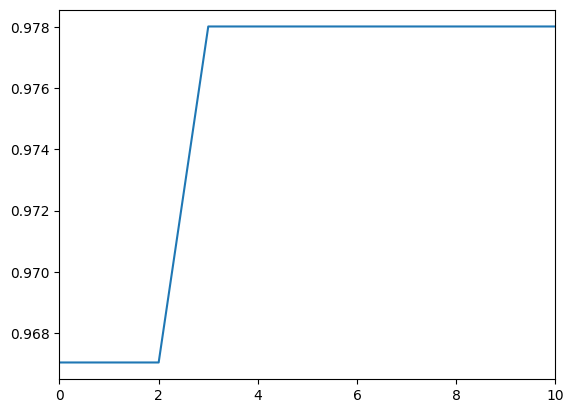

In [8]:
plt.plot(history_f)
plt.xlim(0,iters)

In [9]:
[c.values for c in history_b]

[{'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013553271800569812,
  'shrinking': False,
  'C': 0.9078157943200964,
  'max_iter': 928},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013553271800569812,
  'shrinking': False,
  'C': 0.9078157943200964,
  'max_iter': 928},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.0013553271800569812,
  'shrinking': False,
  'C': 0.9078157943200964,
  'max_iter': 928},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.01,
  'shrinking': True,
  'C': 0.06133076954747524,
  'max_iter': 614},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.01,
  'shrinking': True,
  'C': 0.06133076954747524,
  'max_iter': 614},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.01,
  'shrinking': True,
  'C': 0.06133076954747524,
  'max_iter': 614},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.01,
  'shrinking': True,
  'C': 0.06133076954747524,
  'max_iter': 614},
 {'kernel': 'poly',
  'degree': 1,
  'gamma': 0.01,
  'shrinking': True,
  'C': 0.06133076954747524,
 

In [10]:
clf.set_params(**history_b[-1].values)
clf.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))
accuracy_score(y_test, clf.predict(X_test))

/home/andrea/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=614).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9473684210526315